# Problem 1 (40 pts)

Many learning problems can be formulated as optimization problems which aim at optimization of target function $f(\theta)$. Typically, each evaluation of $f(\theta)$ is computationally **very expensive**. 

What **Bayesian optimization** approach does: 

 * Find such $\theta^*$ that $f(\theta^*)$ is maximal. 
 * And at the same time, **reduce** the number of evaluations $f(\theta)$.

**We want to find the maximum of a function $f(x)$**.<br> 

Let us consider a function $f(x) = (1- \tanh(x^2))\sin(4x)$.

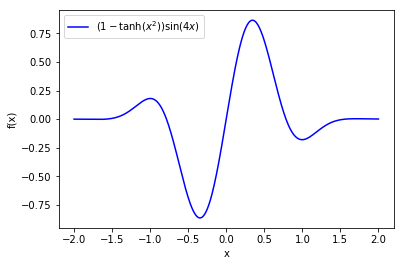

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.spatial as SP


def f(x):
    return (1 - np.tanh(x.flatten()**2)) * np.sin(x.flatten() * 4)


X_test = np.linspace(-2, 2, 400)[:, None]
plt.plot(X_test, f(X_test), 'b', label=r"$(1- \tanh(x^2))\sin(4x)$")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc='best')
plt.show()

You have only $N$ noisy outputs of the function $f(x)$ and you need to know at which point you should sample next in order to find maximum of $f(x)$.

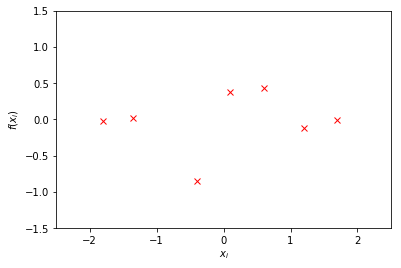

In [2]:
X_train = np.array([-1.8, -1.35, -0.4, 0.1, 0.6, 1.2, 1.7])[:, None]
Y_train = f(X_train) + 0.01 * np.random.randn()
plt.plot(X_train, Y_train, 'rx')
plt.xlabel("$x_i$")
plt.ylabel("$f(x_i)$")
plt.axis([-2.5, 2.5, -1.5, 1.5])
plt.show()

**Again, the main question here is where to sample next?**

Let us fit a GPR model to our the data. This gives a posteriors distribution of functions that can generate this data.

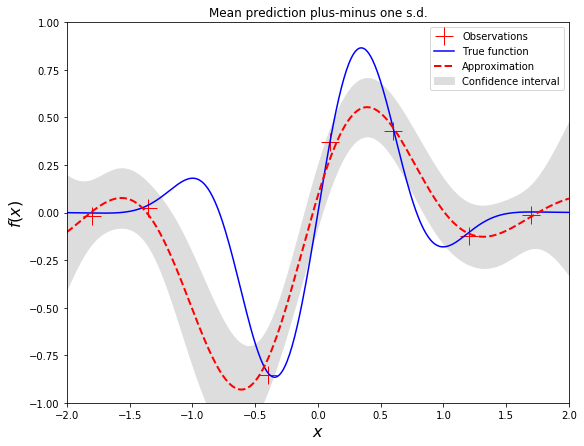

In [3]:
def kernel(a, b):
    return np.exp(-.5 * SP.distance.cdist(a, b, 'sqeuclidean') /
                  (length_scale**2))


np.random.seed(1)

length_scale = 0.6
sigma = 0.03

N = len(X_train)
n = len(X_test)

K = kernel(X_train, X_train)
L = np.linalg.cholesky(K + sigma * np.eye(N))

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X_train, X_test))
mu = np.dot(Lk.T, np.linalg.solve(L, Y_train))

# compute the variance at our test points.
K_ = kernel(X_test, X_test)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

plt.figure(figsize=(9, 7))
plt.plot(X_train, Y_train, 'r+', ms=18, label="Observations")
plt.plot(X_test, f(X_test), 'b-', label="True function")
plt.gca().fill_between(
    X_test.flat, mu - s, mu + s, color="#dddddd", label="Confidence interval")
plt.plot(X_test, mu, 'r--', lw=2, label="Approximation")
plt.title(r'Mean prediction plus-minus one s.d.')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16)
plt.axis([-2, 2, -1, 1])
plt.legend()
plt.show()

This plot represents prediction of the mean of $f(x)$ and corresponding confidence interval.

** According to this plot, is it a good idea to sample in the point at the maximum of mean prediction?<be>
Or better to sample in the point where the uncertainty is maximal? **
    
Answering to these questions defines the exploration-exploitation trade-off.

### Utility (acquisition) functions
Actually, acquisition function answers to the question above.

In the Lecture 6 three different acquisition functions were mentioned:

* Probability of improvement,
* Expected improvement,
* GP-UCB (Upper Confidence Bound).

In [4]:
def probability_of_improvement(x):

    # your code here
    """ Returns the probability of improvement at query point x. """
    return probability_of_improvemen(x)


def expected_improvement(x):

    # your code here
    """ Returns the expected improvement at query point x. """
    return expected_improvement(x)


def upper_confidence_bound(x):

    # your code here
    """ Returns the upper confidence point of performance at query point x. """
    return UCB(x)

### Bayesian Optimization

Finally, we are approaching task formulations.

Bayesian optimization algorithm iteratively selects points where the function should be evaluated:

* Fitting a GP model.
* Defining an acquisition function.
* Find a maximum of acquisition function by using a numerical optimization algorithm.

### Tasks:
- **(30 pts)** Implement any **two** acquisition functions and using them find the maximum of $f(x), x\in[-2,2]$
- **(10 pts)** Plot all the results and explain which acquisition function is better and why. 

# Problem 2 (40 pts)

### Covariance Function Parameter Estimation
As we have seen in the Lecture 6, the parameters of the kernel can be estimated by maximizing the log-likelihood of the observations.

Let us consider a function $f(x) = 0.5\cos(2x)+\sin(0.9x)$.

You have $N$ noisy outputs of the function $f(x)$: $y_i = f(x_i) + \mathcal{N}(0,0.1), i = \{1,\ldots,N\}$ and you need to build a Gaussian process model for the this data using a squared exponential kernel with parameters $\ell$ and $\sigma$.

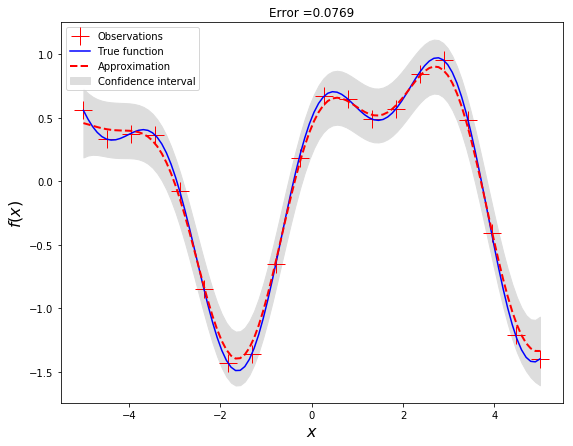

In [7]:
# GP model is here
np.random.seed(4)


def kernel(a, b):
    return np.exp(-.5 * SP.distance.cdist(a, b, 'sqeuclidean') /
                  (length_scale**2))


def f(x):
    return 0.5 * np.cos(2 * x.flatten()) + np.sin(0.9 * x.flatten())


X_train = np.linspace(-5, 5, 20)[:, None]
X_test = np.linspace(-5, 5, 100)[:, None]

Y_train = f(X_train) + 0.01 * np.random.randn(X_train.shape[0])

# KERNEL PARAMETERS (\ell, \sigma)
length_scale = 1.
sigma = 0.1

N = len(X_train)
n = len(X_test)

K = kernel(X_train, X_train)
L = np.linalg.cholesky(K + sigma * np.eye(N))

# compute the mean at our test points.
Lk = np.linalg.solve(L, kernel(X_train, X_test))
mu = np.dot(Lk.T, np.linalg.solve(L, Y_train))

# compute the variance at our test points.
K_ = kernel(X_test, X_test)
s2 = np.diag(K_) - np.sum(Lk**2, axis=0)
s = np.sqrt(s2)

plt.figure(figsize=(9, 7))
plt.plot(X_train, Y_train, 'r+', ms=18, label="Observations")
plt.plot(X_test, f(X_test), 'b-', label="True function")
plt.gca().fill_between(
    X_test.flat, mu - s, mu + s, color="#dddddd", label="Confidence interval")
plt.plot(X_test, mu, 'r--', lw=2, label="Approximation")
plt.title(r'Mean prediction plus-minus one s.d.')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$f(x)$', fontsize=16)
plt.title('Error =' + str(
    round(
        np.linalg.norm(f(X_test) - mu, ord=np.inf
                       ) / np.linalg.norm(f(X_test), ord=np.inf), 4)))
plt.legend()

plt.show()

**Your goal in this problem is to fit parameters $(\ell,\sigma)$ of the GP model by maximizing log-likelihood $L(\ell,\sigma) = \log{p(\mathbf{y}\mid\mathbf{x},\ell,\sigma)}$.**

* **(20 pts)** In the GP model defined above:
    * implement log-likelihood function $L(\ell,\sigma)$; 
    * plot the contour plot of the $L(\ell,\sigma)$ for two kernel parameters $(\ell,\sigma)$; 
    * using this plot, find an "optimal" values of $(\ell^*,\sigma^*)$ (where $L(\ell^*,\sigma^*)$ is maximal) and run the GP model with these parameters; 
    * plot the results and the value of log-likelihood, compute approximation error.  
* **(10 pts)** Now, let's optimize $L(\ell,\sigma)$ with the use of numerical optimizers, say, ```scipy.optimize```:
    * set initial values of parameters $(\ell,\sigma) = 1.0, 1.5$ and find optimal $(\ell^*,\sigma^*)$ by optimization of $L(\ell,\sigma)$; 
    * plot the results, value of log-likelihood, compute approximation error.  
* **(10 pts)** Again, maximize $L(\ell,\sigma)$ for the same GP model: 
    * this time initialize parameters $(\ell,\sigma) = 0.1, 0.1$. What has happened?
    * plot the results, value of log-likelihood, compute approximation error;
    * compare the results of all the three experiments and explain why they are similar/different.